           Date     Open     High     Low   Close  Volume
2421 2010-01-08   9.4497   9.4497  9.0197  9.3105   35770
2422 2010-01-07   9.5300   9.5300  9.4497  9.4497    2930
2423 2010-01-06   9.8070   9.8070  9.5360  9.5800   14665
2424 2010-01-05   9.8940   9.9290  9.5720  9.8070    8661
2425 2010-01-04  10.0310  10.0310  9.7110  9.8270    1505
          Date    Open    High     Low   Close  Volume
675 2017-01-09  73.790  75.197  72.414  72.813   14825
676 2017-01-05  75.705  75.805  73.312  73.511   19547
677 2017-01-04  76.603  76.703  75.606  75.606    2971
678 2017-01-03  77.800  77.900  76.503  76.503    2055
679 2017-01-02  74.858  77.102  73.810  77.102   14020
          Date    Open    High     Low   Close  Volume      Mean
675 2017-01-09  73.790  75.197  72.414  72.813   14825  73.55350
676 2017-01-05  75.705  75.805  73.312  73.511   19547  74.58325
677 2017-01-04  76.603  76.703  75.606  75.606    2971  76.12950
678 2017-01-03  77.800  77.900  76.503  76.503    2055  77.176

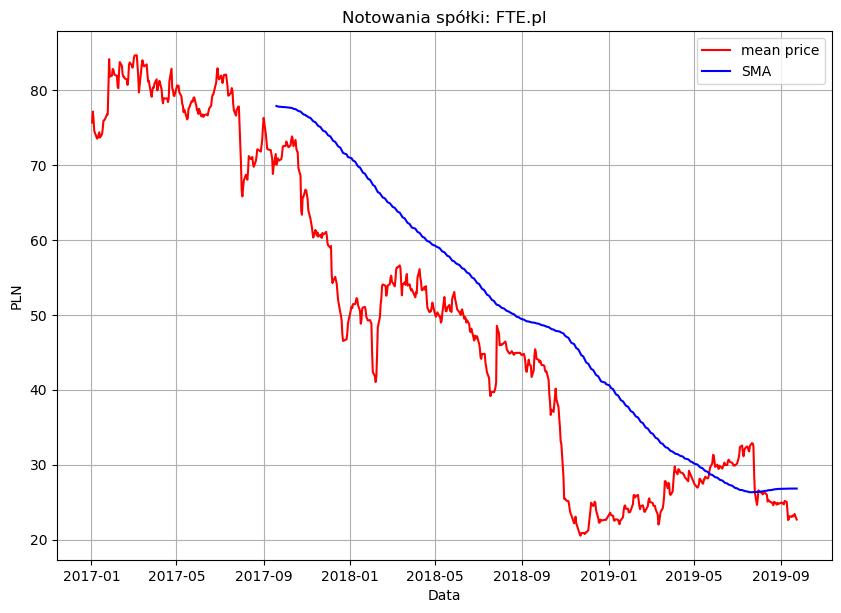

In [54]:
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
pd.plotting.register_matplotlib_converters()

def modify_source(csv_file):
    result = csv_file.reset_index()
    return result

def mean_serie():
    data_from['Mean'] = (data_from['High'] + data_from['Low'] + data_from['Open'] + data_from['Close']) / 4


def sma():
    windowSizes = [20, 60, 80, 100, 120, 140, 160, 180]
    profits = dict()
    for k in windowSizes:
        data_from['SMA'] = data_from['Mean'].rolling(window=k).mean().shift(1-k)
        buy = []
        sell = []
#         data_from = data_from[::-1]
#         data_from.tail()
#         data_from = data_from.reset_index()
#         data_from.tail()
#         del data_from['index']
#         data_from.tail()
        for i in range(1, len(data_from)):
            if (data_from.loc[i, 'SMA'] < data_from.loc[i,'Mean']) & (data_from.loc[i-1, 'SMA'] >= data_from.loc[i-1,'Mean']):
                buy.append(data_from.loc[i, 'Mean'])
            elif len(buy) != 0:
                if (data_from.loc[i, 'SMA'] > data_from.loc[i,'Mean']) & (data_from.loc[i-1, 'SMA'] <= data_from.loc[i-1,'Mean']):
                    sell.append(data_from.loc[i,'Mean'])
                else:
                    pass
            else: 
                pass
#         print(buy)
        print(len(buy))
#         print(sell)
        print(len(sell))

        outcome = [j - i for i, j in zip(buy, sell)]
        profit_sum = sum(outcome)
        print(profit_sum)
        
        
        def addNumber(k, profit_sum):
            for i in profits:
                if i == k:
                    print('error')
                    return 
            profits[k] = profit_sum

        addNumber('{}'.format(k),profit_sum)
    print(profits)
    optimal_k = int(max(profits, key=profits.get))
    print(optimal_k)
    data_from['Opt SMA'] = data_from['Mean'].rolling(window=optimal_k).mean().shift(1-optimal_k)
    print(df.head())

for symbol in ['FTE.pl']:
    df = web.DataReader(symbol, 'stooq')
    df = modify_source(df)
    print(df.tail())

    data_from = df.loc[df['Date'] >= '2017-01-01'].copy()
    print(data_from.tail())
    mean_serie()
    print(data_from.tail())

    
    sma()

    print(data_from.tail(25))
    x = list(data_from['Date'])
    y = list(data_from['Mean'])
    z = list(data_from['SMA'])
    plt.figure(figsize=(10,7), dpi=100)
    plt.plot(x, y, color='red', marker='', linestyle='solid', label='mean price')
    plt.plot(x, z, color='blue', marker='', linestyle='solid', label='SMA')
    plt.title("Notowania spółki: {}".format(symbol))
    plt.ylabel('PLN')
    plt.xlabel("Data")
    plt.grid()
    plt.legend()
    plt.savefig('charts/{}.png'.format(symbol))
    plt.show()    
    
 

